In [ ]:
%pylab inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import linalg
from itertools import combinations
import scipy
import scipy.io as io
import scipy.sparse as sparse
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.8/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


$\def\m#1{\mathbf{#1}}$
$\def\mm#1{\boldsymbol{#1}}$
$\def\mb#1{\mathbb{#1}}$
$\def\c#1{\mathcal{#1}}$
$\def\mr#1{\mathrm{#1}}$
$\newenvironment{rmat}{\left[\begin{array}{rrrrrrrrrrrrr}}{\end{array}\right]}$
$\newcommand\brm{\begin{rmat}}$
$\newcommand\erm{\end{rmat}}$
$\newenvironment{cmat}{\left[\begin{array}{ccccccccc}}{\end{array}\right]}$
$\newcommand\bcm{\begin{cmat}}$
$\newcommand\ecm{\end{cmat}}$


# Homework 3
## Homework guideline

- The deadline is Oct 26th 10:30am. Submission after the deadline will not be graded. 

- Submit your work(your reasoning and your code) as a SINGLE .ipynb document. Please rename the document as _HW1_YOURNAME.ipynb_ (for example, _HW1_FELIX.ipynb_). You are responsible for checking that you have correctly submitted the correct document. If your code cannot run, you may receive NO point. 

- Please justify all short answers with a brief explanation. If you use latex command in the markdown, **2 points** bonus will be awarded.   

- You only use the Python packages included in the following cell. You are not allowed to use other advanced package or modules unless you are permitted to. 

- In your final submission include the plots produced by the unedited code as presented below, as well as any additional plots produced after editing the code during the course of a problem. You may find it necessary to copy/paste relevant code into additional cells to accomplish this.

- Feel free to use the lecture notes and other resources. But you
must understand, write, and hand in your own answers. In addition, you must write and submit
your own code in the programming part of the assignment (we may run your code).
If you copy someone else homework solution, both of you may receive ZERO point. 


- Colab is preferred. However, if you use Anaconda, please download the .mat file locally and save it to the same folder as this homework file. 

**Collaboration:** List the names of all people you collaborated with and for which question(s). This is important!





---



---


# Tips on Pandas Dataframe
DataFrames are similar to Numpy arrays but more flexible;
unlike Numpy arrays, they store row and column indices along with the values of the data. Each column of
a DataFrame can also, in principle, store data of a different type. For this assignment, however, all data are
floats. Here are a few commands that will get you working with Pandas for this assignment:

|         |                                                       |
|---------|-------------------------------------------------------|
|df.head()    |# Print the first few lines of DataFrame df.                        |
|df.index  | # Get the row indices for df.                   |
|df.columns  |# Get the column indices.                                |
|df['foo']    | # Return the column named ‘foo’.                                              |
|df.drop(‘foo’, axis = 1)    |# Return all columns except ‘foo’.           |
|df.values    |# Return the values as a Numpy array.                           |
|df[‘foo’].values     |# Grab column foo and convert to Numpy array.                           |
|df.iloc[:3,:3]    |# Use numerical indices (like Numpy) to get 3 rows and cols.                            |

You may also refer to the following [cheat sheet](https://github.com/yexf308/MAT592/blob/main/Module0/pandas_cheat_sheet.pdf).



---



---


# Q1: Bias-Variance trade-off (30pt)
Let $\mm\theta\in\mb{R}^n$ be the unknown true means of our $n$ Gaussian distributions,i.e., we get a vector $\m{X}$ where each $\m{X}_i\sim \c{N}(\theta_i, \sigma^2), i=1,\dots, n$. We assume every Gaussian distribution has the same variance and is independent, but means can be different. Our job is to find the estimator $\hat{\mm\theta}$ to minimize the expected error $\mb{E}[\|\hat{\mm\theta}-\mm\theta\|_2^2]$.  All expectations are taken with respect to the random draws of the $\m{X}_i$ random variables.



---


### Q1.1 Derivation (10pt)
**Show** the Bias-Variance trade-off formula for the estimator
\begin{align}
\mb{E}[\|\hat{\mm\theta}-\mm\theta\|_2^2] = \mb{V}[\hat{\mm\theta}]+\text{bias}^2[\hat{\mm\theta}]
\end{align}
where $\mb{V}[\hat{\mm\theta}] = \mb{E}[\|\hat{\mm\theta} -\mb{E}[\hat{\mm\theta}]\|_2^2]$ and $\text{bias}^2[\hat{\mm\theta}] = \|\mb{E}[\hat{\mm\theta}-\mm\theta]\|_2^2$

# Your Solution:
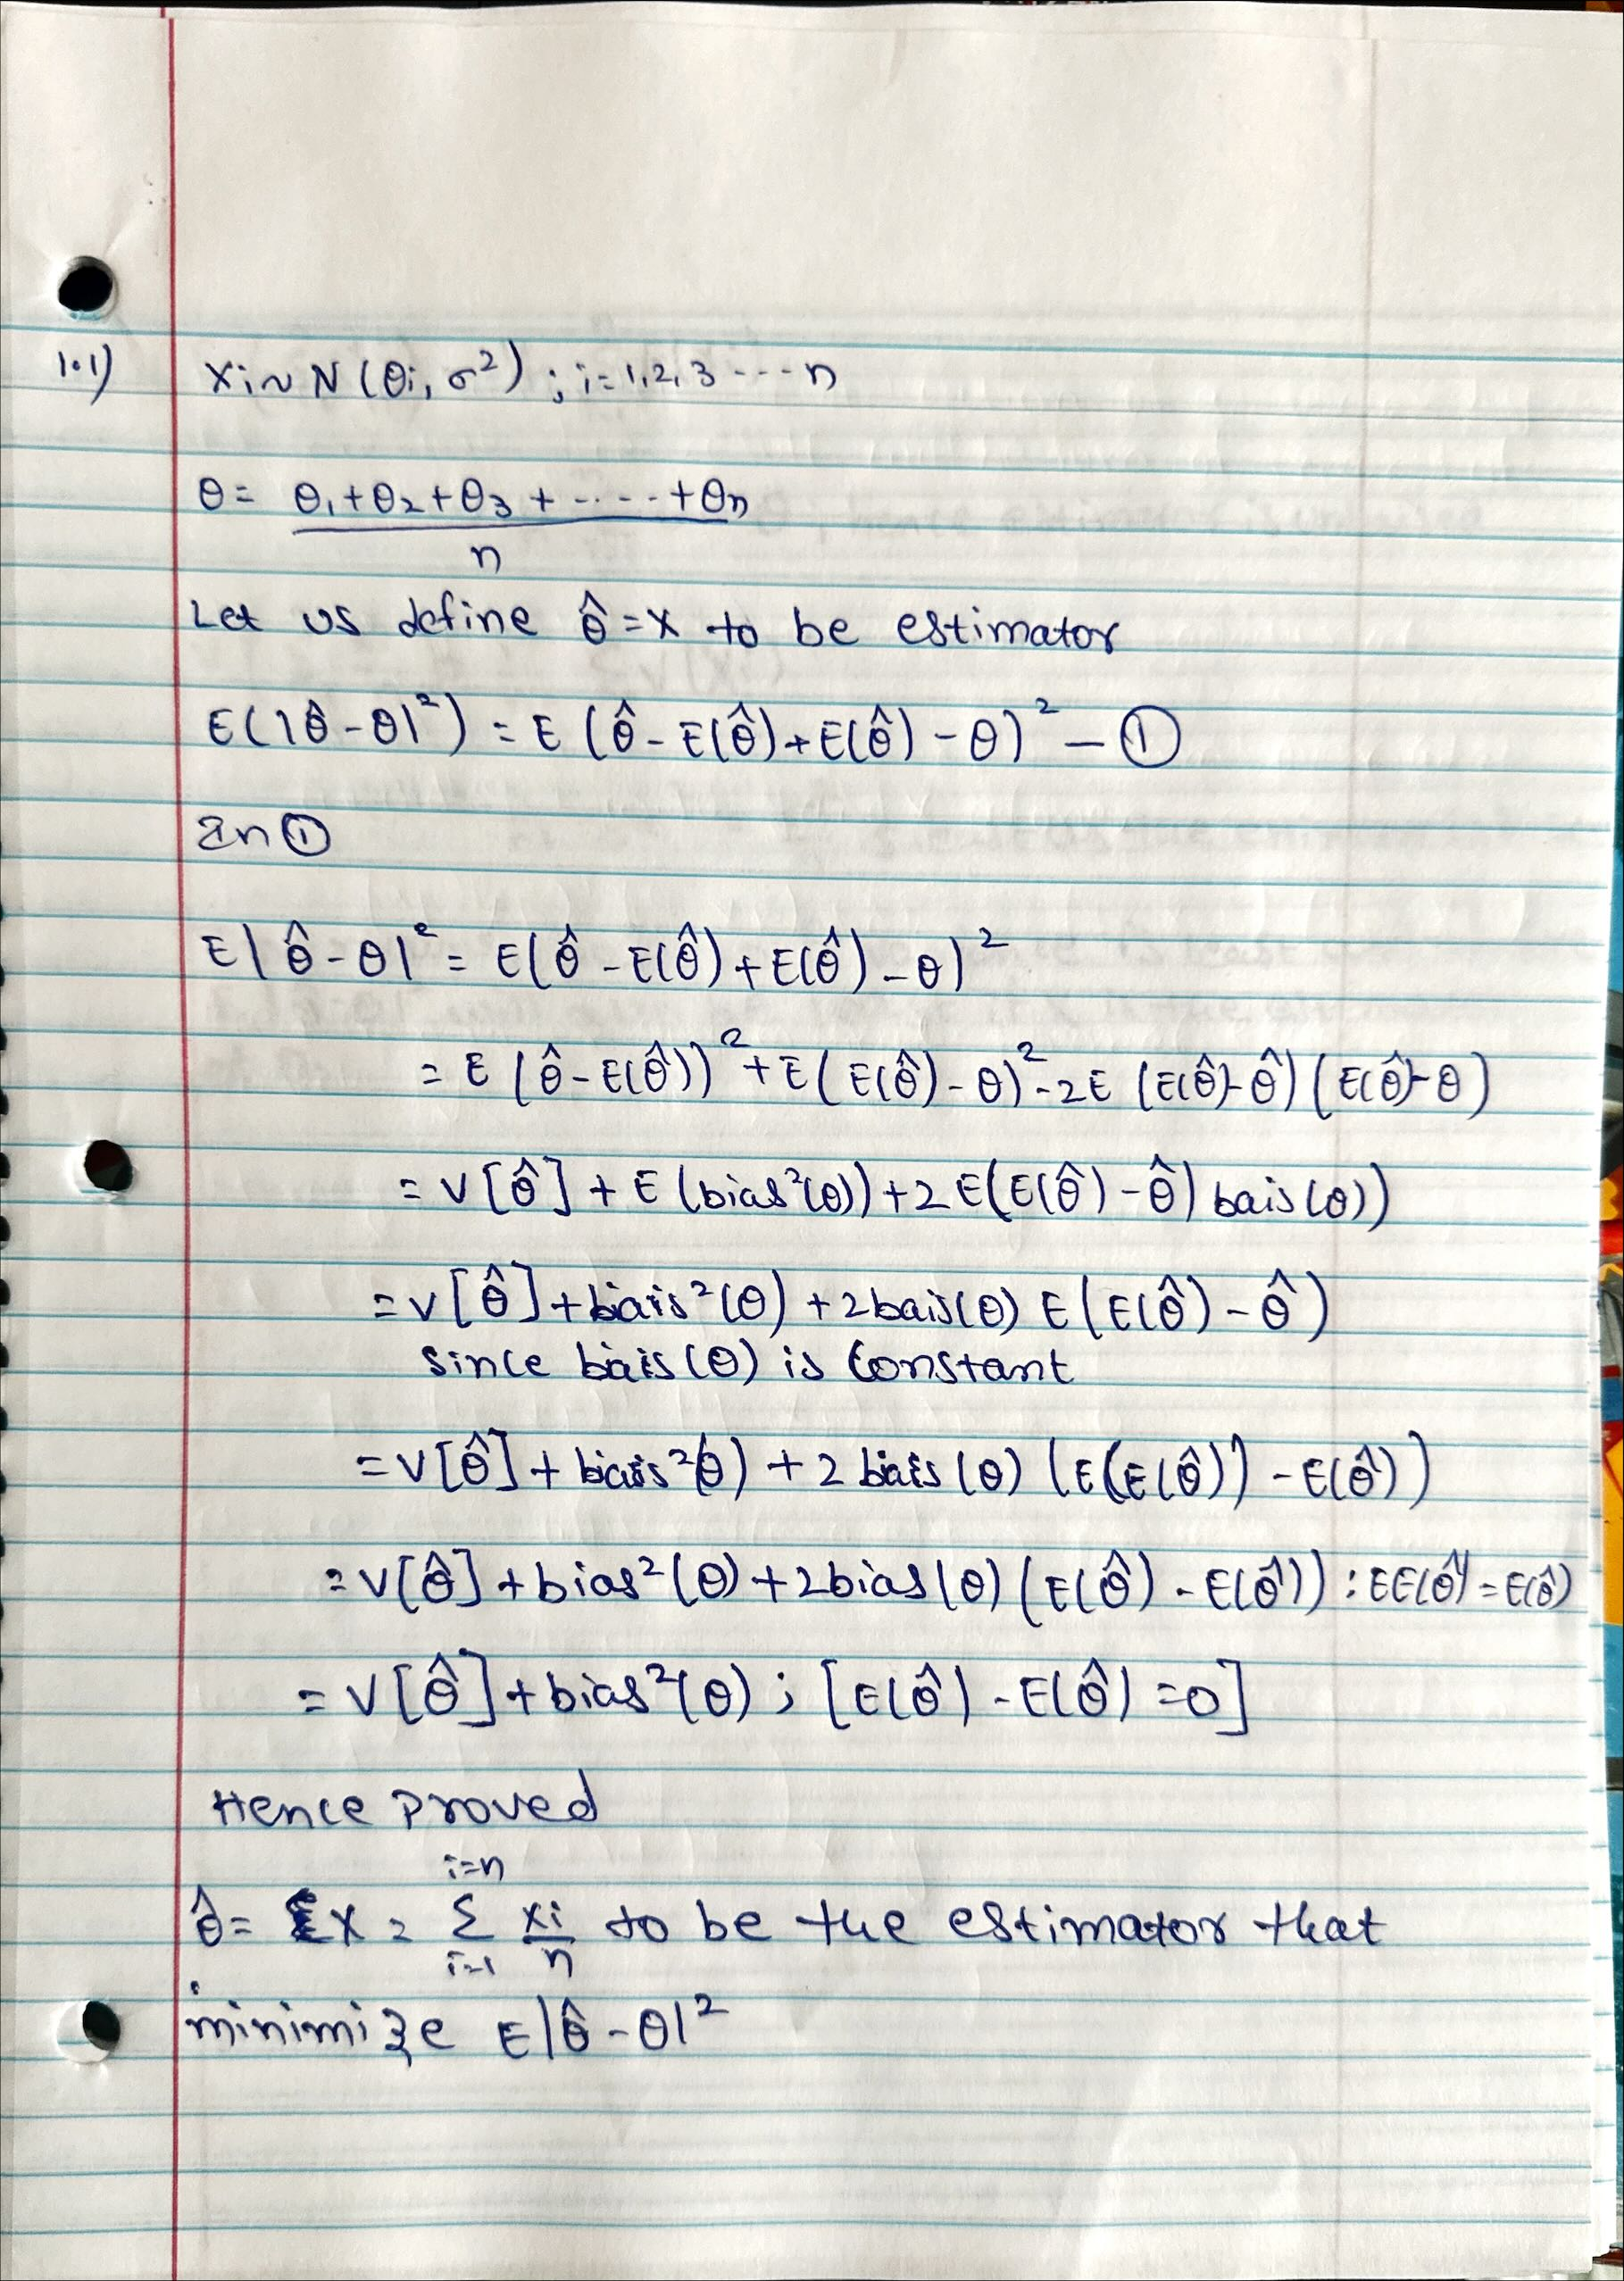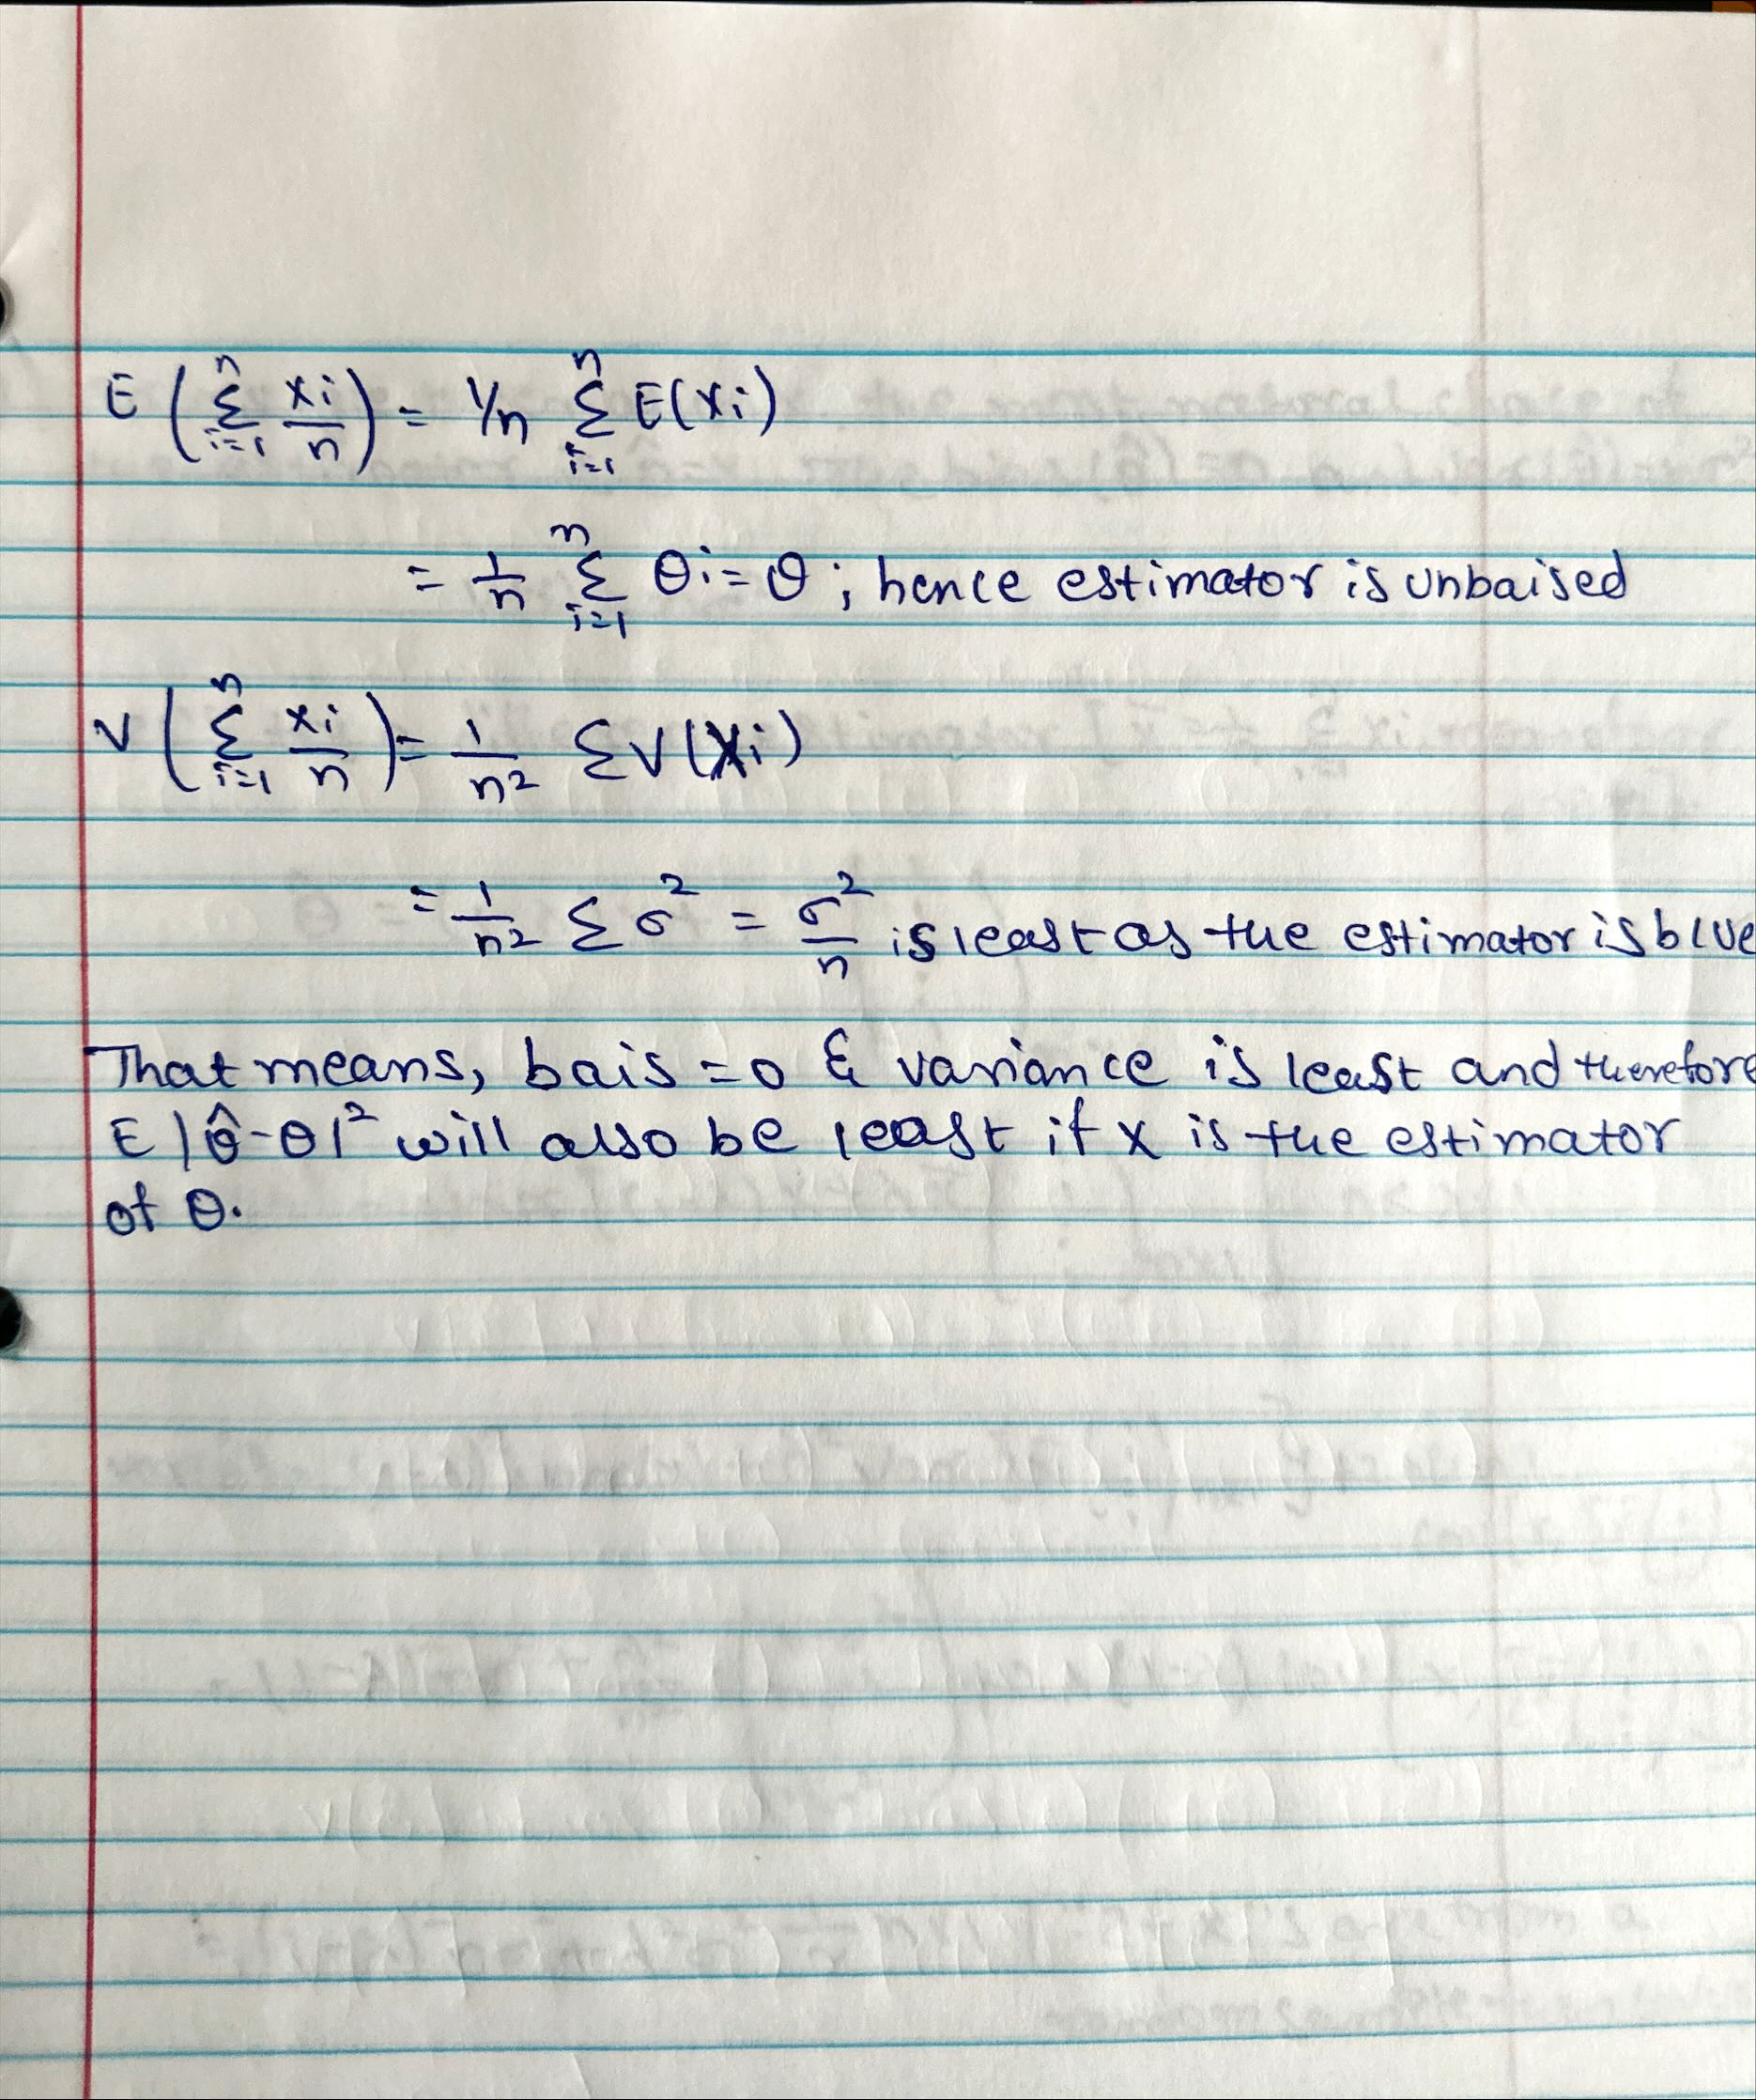



---


If we only observe one data, which is just $\m{X}$. Of course, the most natural choice of the estimator is $\hat{\mm\theta}=\m{X}$. Then $\text{bias}[\hat{\mm\theta}]=0$ and $\mb{V}[\hat{\mm\theta}] =n\sigma^2 $. 

Let's try a different estimator. 
In class, we discussed the shrinkage estimation toward 0. Here we will shrink toward the mean of all of your data points, $\bar{X}=\frac{1}{n}\sum_{i=1}^n \m{X}_i$, i.e., 
\begin{align}
\hat{\mm\theta} = (1-\lambda) \m{X} +\lambda \bar{X}\mb{1}.
\end{align}
where $\mb{1}$ is the $n\times 1$ vector of all 1's and $\lambda$ is the real number between 0 and 1. 


---


### Q1.2 Variance (6pt)
What is the variance of the estimator $\hat{\mm\theta}=(1-\lambda)\m{X}+\lambda \bar{X}\mb{1}$?


# Your Solution:
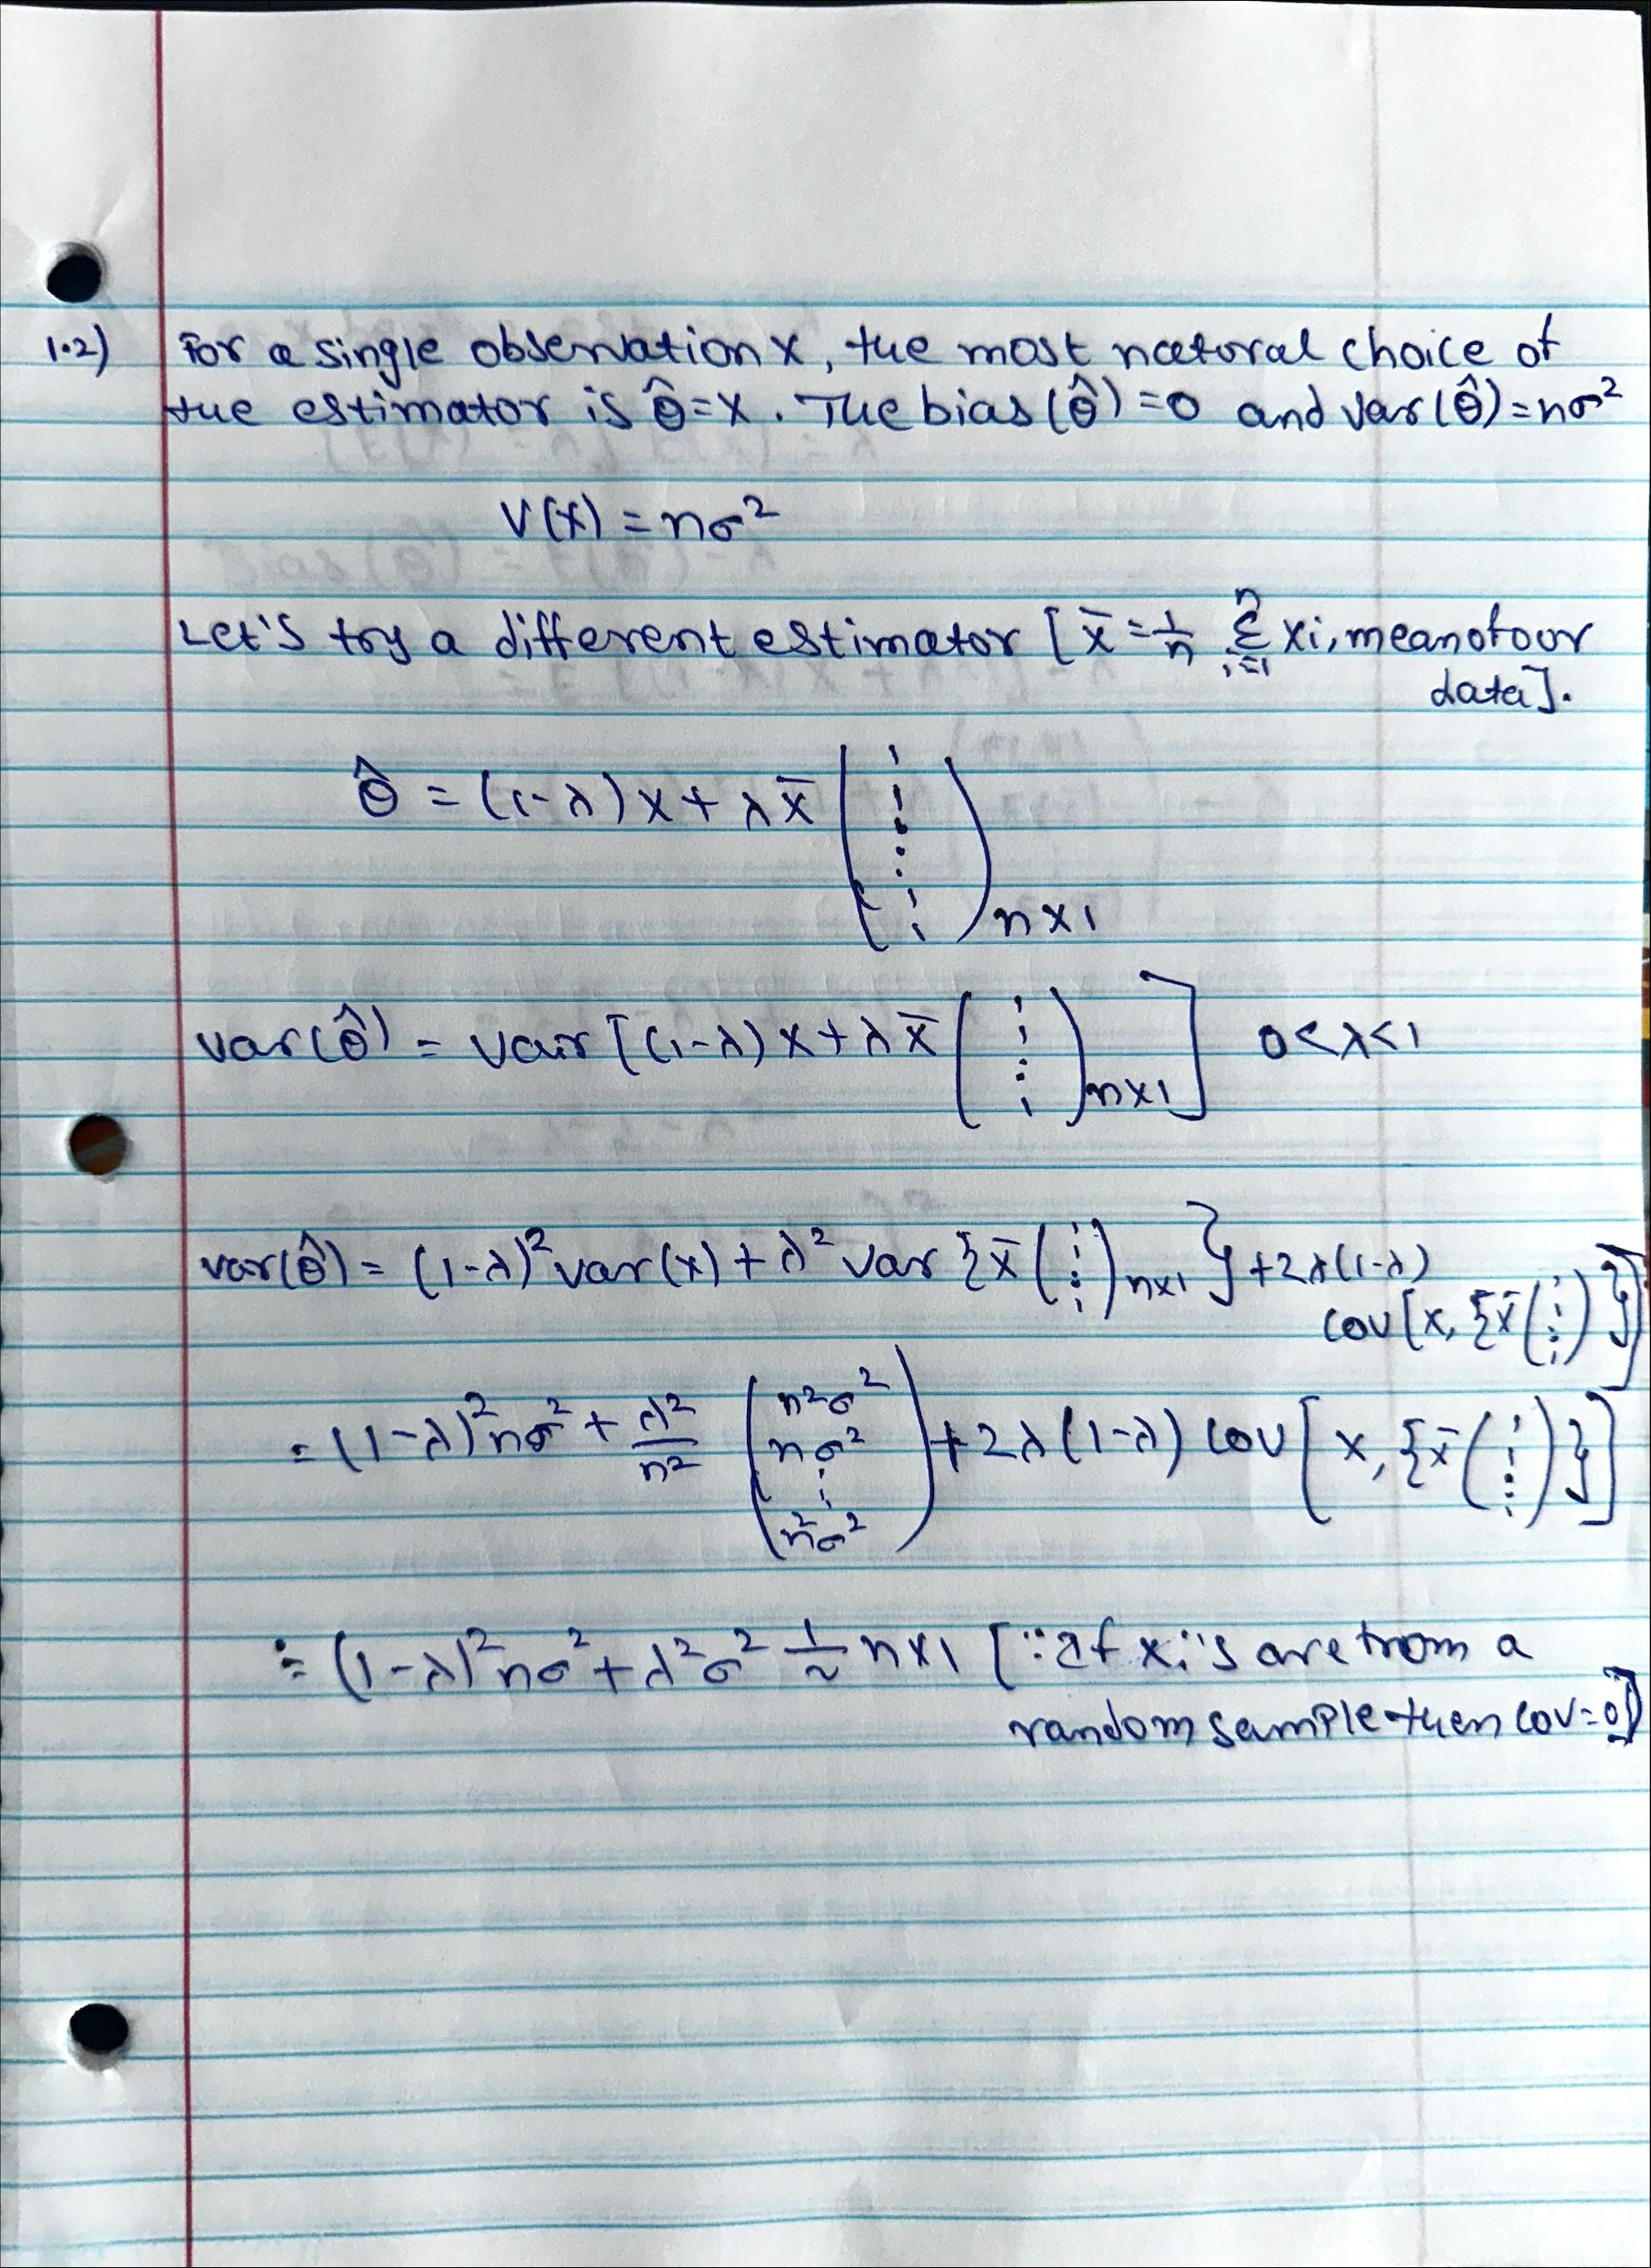



---


### Q1.3 $\text{Bias}^2$ (6pt)
What is the $\text{Bias}^2$ of the estimator $\hat{\mm\theta}$? 

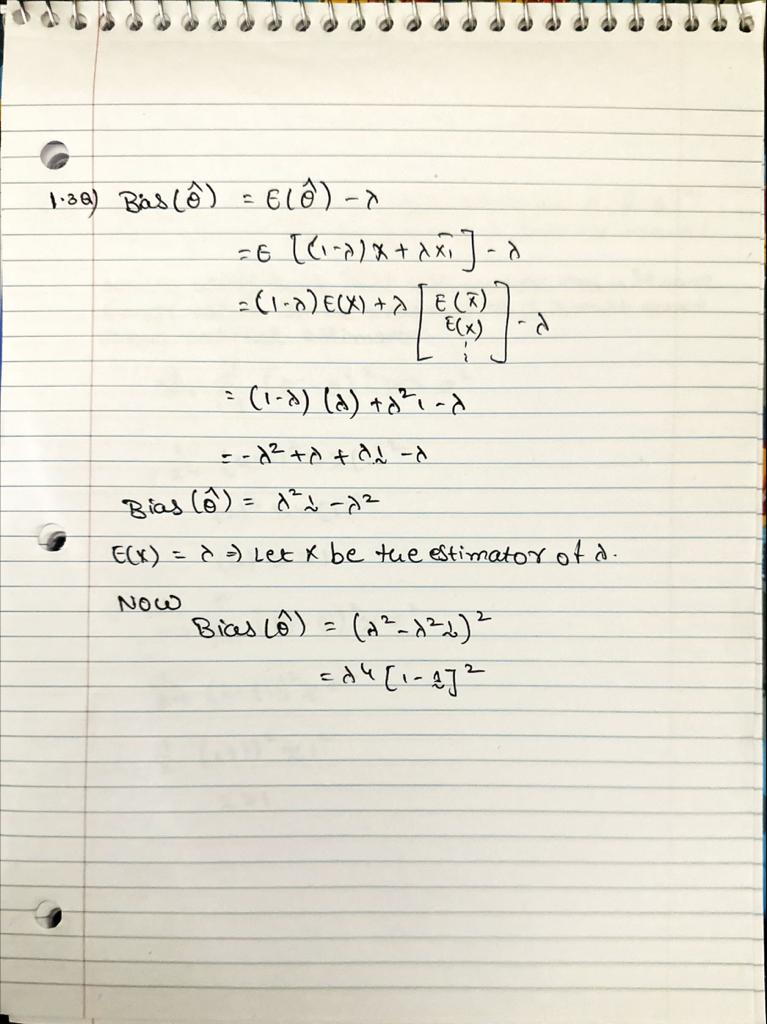



---


### Q1.4 Optimal $\lambda$ (8pt)
- What value of $\lambda$ will result in the best estimator? 

- How much better compared to the natural estimator. 

- Describe how the optimal value of $\lambda$ found changes if $\frac{1}{n-1}\sum_{i=1}^n (\mm\theta_i-\bar{\mm \theta})^2 \gg \sigma^2$, $\frac{1}{n-1}\sum_{i=1}^n (\mm\theta_i-\bar{\mm \theta})^2 \approx \sigma^2$, or $\frac{1}{n-1}\sum_{i=1}^n (\mm\theta_i-\bar{\mm \theta})^2 \ll \sigma^2$?

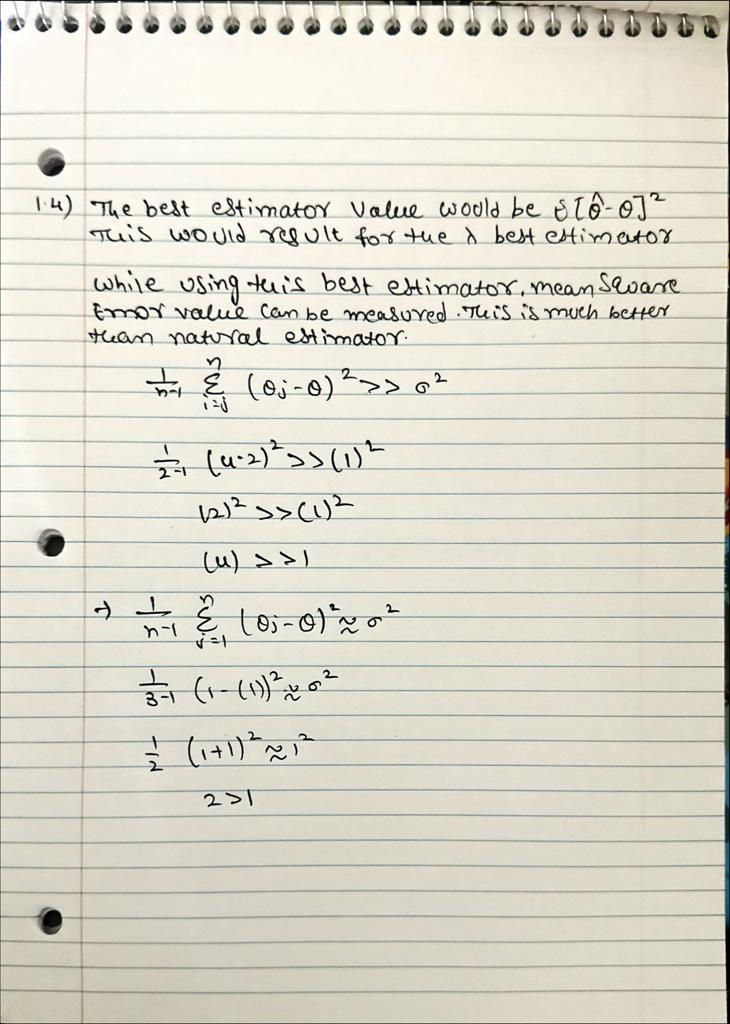



---



---


# Q2: USA Crime data (30pt)
**Please read the problem description carefully.**

### Data Set Description
The following data consist of local crime statistics for 1994 US communities. We have split the dataset into a training and testing set with 1595 and 399 entries, respectively. We’d like to use
this training set to fit a model to predict the crime rate in new communities and evaluate model performance on
the test set. As there are a considerable number of input variables and fairly few training datapoints, overfitting
is a serious issue. In order to avoid this, use the **stochastic coordinate descent LASSO algorithm**.

The response $y$ is the rate of violent crimes
reported per capita in a community. The name of the response variable is `ViolentCrimesPerPop`, and it is held
in the first column of `df_train` and `df_test`. There are 95 features. These features include many variables.
Some features are the consequence of complex political processes. Others
are demographic characteristics of the community, including self-reported statistics about race, age, education,
and employment drawn from Census reports. You may read the documentation for the original version of this dataset: http://archive.ics.uci.edu/ml/datasets/communities+and+crime. For example, `PctYoungKids2Par` represents percent of kids 4 and under in two parent households (numeric - decimal). 

 Note **the features have been standardized to have mean 0 and variance 1**.

The goals of this problem are twofold:
- Think deeply about models you might train and
how they might be misused.

- See how Lasso encourages sparsity of linear models in settings where
the feature set is very large relative to the number of training examples.

We emphasize that training a
model on this dataset can suggest a degree of correlation between a community’s demographics
and the rate at which a community experiences and reports violent crime. We strongly encourage
you to consider why these correlations may or may not hold more generally, whether correlations might
result from a common cause, and what issues can result in misinterpreting what a model can explain.
 

In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-train.txt?raw=true -O crime-train.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-test.txt?raw=true -O crime-test.txt

--2022-12-07 01:01:16--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-train.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 855572 (836K) [text/plain]
Saving to: ‘crime-train.txt’

crime-train.txt     100%[===================>] 835.52K  --.-KB/s    in 0.05s   

2022-12-07 01:01:17 (15.2 MB/s) - ‘crime-train.txt’ saved [855572/855572]

--2022-12-07 01:01:17--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/crime-test.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
df_train = pd.read_table("crime-train.txt")
df_test = pd.read_table("crime-test.txt")

In [ ]:
df_train.head()

,ViolentCrimesPerPop,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn
0,0.67,-0.45,-1.85,-1.06,0.67,0.08,-0.85,-0.34,0.68,-0.24,...,-0.23,-0.02,-0.53,-1.08,-0.13,-0.66,-0.41,-0.56,1.26,-0.39
1,0.43,-0.45,-0.27,-0.22,-0.17,-0.34,-0.58,-0.50,-1.57,-0.29,...,-0.23,-0.33,-0.58,0.03,0.22,-0.46,-0.50,-0.11,-0.62,-0.39
2,0.12,-0.14,1.87,0.55,0.04,0.02,-1.19,-0.03,0.68,1.05,...,-0.23,-0.11,-1.51,1.07,0.07,-0.01,-0.41,0.77,0.52,-0.39
3,0.03,-0.38,0.53,-0.28,-0.79,-0.64,-0.35,-0.34,0.46,0.66,...,-0.23,-0.46,0.54,0.58,-0.08,-0.61,-0.23,-0.70,-0.62,-0.39
4,0.14,-0.30,-1.12,-0.74,-0.10,-0.40,-0.30,-0.19,0.68,0.76,...,-0.23,2.10,-0.92,-0.25,0.52,-0.06,-0.50,1.71,-0.27,-0.39


In [ ]:
df_train.columns

Index(['ViolentCrimesPerPop', 'population', 'householdsize', 'agePct12t21',
       'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban',
       'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec',
       'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'HispPerCap',
       'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad',
       'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
       'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig',
       'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10',
       'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8', 'PctRecImmig10',
       'PctSpeakEnglOnly', 'PctNotSpe




### Q2.1: *Result* rather than *Cause* (5pt)
Before you train a model for this prediction task, **describe 3 features** in the dataset which might,
if found to have nonzero weight in model, be interpreted as reasons for higher levels of violent crime, but
which might actually be a *result* rather than (or in addition to being) the *cause* of this violence. 

# Your Solution:
After reading the documentation for the dataset,we think that the features relating to requests will probably be found to have non-zero weights. However, the numbers of request should be consider as the result rather than the reason of the crime rate.


*   (**LemasTotReqPerPop**): total requests for police per 100k population (numeric-decimal)
*   (**LemasTotalReq**): total requests for police (numeric-decimal)
*   (**PolicReqPerOfficg**): total requests for police per police officer (numeric-decimal)





### Q2.2: Stochastic coordinate descent LASSO algorithm (5pt)
In class, we introduce the coordinate descent LASSO algorithm in the round robin way. We can also pick the coordinate randomly. 

**Algorithm:** To minimize function $\ell(\m{w})$

Initialize $\hat{\m{w}}=0$ or smartly
  - Precompute for all coordiate j
     $$ a_j = \m{X}_j^\top \m{X}_j $$
  - While not converged
   - Pick a coodinate j **uniformly at random**, compute

     \begin{align}
     & c_j = \m{X}_j^\top (\m{y}-\m{X}_{-j}\m{w}_{-j}) \\
     & \hat{w}_j = \text{SoftThreshold}\left(\frac{c_j}{a_j},\frac{\lambda}{a_j}\right)
     \end{align} 

Modify the LASSO code in class to stochastic coordinate descent LASSO algorithm.      

In [ ]:
def stocastic_lasso(X, y, lam, tol=1e-6):
  d     = X.shape[1]
  w_s   = zeros(d)
  iter  = 0

  a     = zeros(d)
  index = []
  for j in range(d):
    a[j]     = sum(X[:,j]**2)
    index.append(list(range(0,j)) + list(range(j+1,d)))
  while True:
    w_pre = w_s.copy()
    for k in range(d): 
      j=np.random.uniform(0,d)
      j=np.random.randint(0,d)

      c_j     = np.dot(X[:,j].T, y-np.dot(X[:,index[j]],w_s[index[j]]))
      update  = c_j/a[j]
      w_s[j]  = np.sign(update) * max(abs(update) - lam/a[j], 0)  

    iter = iter + 1
    if np.all(abs(w_s-w_pre)<tol):
      print('Number of iteration is ', iter)
      break

  return w_s    



### Q2.3 (Optional) Efficient LASSO Algorithm 
In fact, the current code is not efficient since it recalculate the same thing again and again in each iteration, which waste a lot of computational power. Please optimize your code, particularly in calculating `c_j` and `update`. Make sure test the correctness and efficiency in your new code. 

In [ ]:
# Q2.3: Your code starts here

### Q2.4: Training (15pt)
- We will run the LASSO solver with $\lambda=\lambda_{\max}$ defined above. 
- For the initial weights, just use 0. Then, cut
$\lambda$ down by a factor of 2 and run again, but this time pass in the values of $\hat{\m w}$ from your $\lambda=\lambda_{\max}$ solution as
your initial weights. This is faster than initializing with 0 weights each time.(You need to modify LASSO function accordingly, e.g., you can let initial weights as your input.) 

- Continue the process of cutting $\lambda$ by a factor of 2 until the smallest value of $\lambda$ is less than 0.01. Define “converging” as the change in any coefficient between one iteration and the next is no larger than $10^{-6}$. 



For all plots use a log-scale for $\lambda$. You use `plt.xscale('log')`. 
- Plot the number of nonzeros of each solution versus $\lambda$. 

- Plot the regularization paths (in one plot) for the coefficients for input features `agePct12t29`,
`pctWSocSec`, `pctUrban`, `agePct65up`, and `householdsize`.

- On one plot, plot the squared error on the training and test data versus $\lambda$.

- Sometimes a larger value of $\lambda$ performs nearly as well as a smaller value, but a larger value will
select fewer variables and perhaps be more interpretable. Inspect the weights (on features) for $\lambda=30$. 
Which feature variable had the largest (most positive) Lasso coefficient? What about the most negative?
Discuss briefly.


Number of iteration is  1
Number of iteration is  2
Number of iteration is  12
Number of iteration is  40
Number of iteration is  92
Number of iteration is  129
Number of iteration is  90
Number of iteration is  113
Number of iteration is  176
Number of iteration is  257
Number of iteration is  661
Number of iteration is  652
Number of iteration is  1171
Number of iteration is  1556
Number of iteration is  1682
Number of iteration is  2065


Text(0.5, 1.0, ' Nonzero coefficients vs Lambda ')

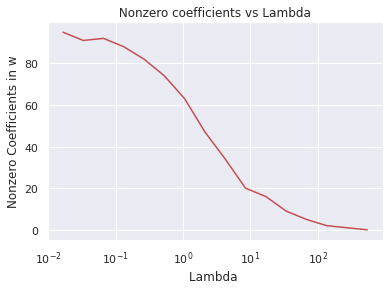

In [ ]:
import numpy as np
import matplotlib . pyplot as plt
import time
def generate_synthetic_data (n , d , k , variance , seed = 100 ):

  if k > d:
    raise ValueError ("The number of relevant features cannot be more than the number of features ")
  elif n < 1 or d < 1 or k < 0 or variance < 0:

    raise ValueError (" Parameters n,d >= 1 and k, variance >= 0 must be true ")
  w_true = np . zeros (( d ,1))
  for j in range ( k):
    w_true [j] = (j+1) / k
    np . random . seed ( seed )
  X = np . random . normal ( size = (n ,d))
  errors = np . random . normal ( scale = np . sqrt ( variance ) , size =(n ,) )
  y = np . reshape ( np . dot ( w_true .T , X.T) + errors .T , (n ,) )
  return (X , y)

def min_null_lambda (X , y):
  return 2*np .max ( np . abs ( np .dot (y.T - np . mean (y ) , X)))


y_train = df_train ["ViolentCrimesPerPop"]. values
X_train = df_train . drop ("ViolentCrimesPerPop", axis =1) . values
y_test = df_test ["ViolentCrimesPerPop"]. values
X_test = df_test . drop ("ViolentCrimesPerPop", axis =1). values
lam_max = min_null_lambda ( X_train , y_train )
lam_ratio = 2
current_lam = lam_max
lam_vals = []
delta = 10e-6
W = None
B = []
while current_lam >= 0.01:
  lam_vals . append ( current_lam )
  w  = stocastic_lasso( X_train , y_train , lam = current_lam , tol =delta )
  if W is None :
    W = np . expand_dims (w , axis =1)
  else :
    W = np . concatenate ((W , np . expand_dims (w , axis =1)) , axis =1 )

  prev_w = np . copy (w )
  current_lam /= lam_ratio

plt . figure (3)
plt . semilogx ( lam_vals , np . count_nonzero (W , axis =0 ) , "r-")
plt . xlabel ("Lambda ")
plt . ylabel ("Nonzero Coefficients in w")
plt . title (" Nonzero coefficients vs Lambda ")










[[ 0.          0.          0.         -0.         -0.         -0.00185521
  -0.01200005 -0.01811862 -0.03086086 -0.0376299  -0.03745809 -0.03572604
  -0.0305227  -0.0281914  -0.02746598 -0.02703776]]
[ 0.          0.          0.         -0.         -0.         -0.00185521
 -0.01200005 -0.01811862 -0.03086086 -0.0376299  -0.03745809 -0.03572604
 -0.0305227  -0.0281914  -0.02746598 -0.02703776]


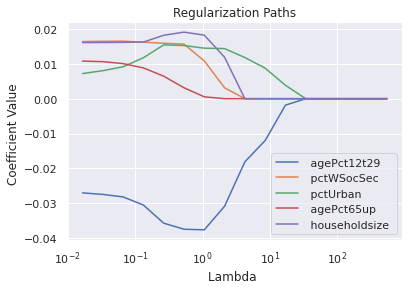

In [ ]:
i1 = np . where ( df_train . columns == "agePct12t29")[0] - 1
i2 = np . where ( df_train . columns == "pctWSocSec")[0] - 1
i3 = np . where ( df_train . columns == "pctUrban")[0] - 1
i4 = np . where ( df_train . columns == "agePct65up")[0] - 1
i5 = np . where ( df_train . columns == "householdsize")[0] - 1
k = len ( lam_vals )
print(W[i1,:])
print(np.reshape(W[i1,:],(k,)))
plt . figure (4)
plt . semilogx ( lam_vals , np . reshape (W[i1 , :],(k , )) , lam_vals , np . reshape (W[i2 , :], (k ,) ) , lam_vals , np . reshape (W[i3 , :], (k ,) ) , lam_vals , np . reshape (W[i4 , :], (k ,) ) , lam_vals , np . reshape (W[i5 , :], (k ,) ))
plt . xlabel ("Lambda ")
plt . ylabel ("Coefficient Value ")
plt . title ("Regularization Paths")
plt . legend ([" agePct12t29 ", " pctWSocSec ", " pctUrban ", " agePct65up ", " householdsize "])

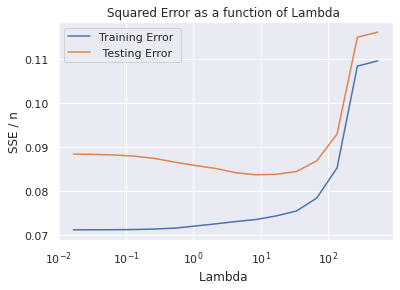

In [ ]:
y_pred_train = np . dot (W .T , X_train .T ) 
SSE_train = 1/ X_train . shape [0] * np . sum ( np . square ( y_pred_train - y_train ) , axis =1)
y_pred_test = np . dot (W.T , X_test .T)
SSE_test = 1/ X_test . shape [0] * np . sum ( np . square ( y_pred_test - y_test ) , axis =1)
plt . figure (5)
plt . semilogx ( lam_vals , SSE_train , lam_vals , SSE_test )
plt . legend (["Training Error ", " Testing Error "])
plt . xlabel ("Lambda ")
plt . ylabel ("SSE / n")
plt . title ("Squared Error as a function of Lambda ")
plt . show ()

In [ ]:
w30 = stocastic_lasso( X_train , y_train , lam = 30 , tol =10e-6 ) 
var_names = df_train . columns [1:] 
nonzero_coeffs = { w30 [i]: var_names [i] for i in range ( len ( w30 )) if not w30[i] == 0}
max_coeff = max( list ( nonzero_coeffs . keys () ))
min_coeff = min( list ( nonzero_coeffs . keys () ))
print ( nonzero_coeffs )
print (" feature with largest coefficient : ", nonzero_coeffs [ max_coeff ], " , value : ", max_coeff)
print (" feature with smallest coefficient : ", nonzero_coeffs [ min_coeff ], " , value : ",min_coeff )

Number of iteration is  30
{0.0007233333400695971: 'FemalePctDiv', 0.012465851674360599: 'TotalPctDiv', -0.06763926221617181: 'PctKids2Par', 0.0695043387733196: 'PctIlleg', 0.024774627757723638: 'PctPersDenseHous', 0.01753381285906692: 'HousVacant', 0.00811814111156715: 'NumStreet', 0.0018474865259945766: 'LemasPctOfficDrugUn'}
 feature with largest coefficient :  PctIlleg  , value :  0.0695043387733196
 feature with smallest coefficient :  PctKids2Par  , value :  -0.06763926221617181


Q): Sometimes a larger value of  λ  performs nearly as well as a smaller value, but a larger value will select fewer variables and perhaps be more interpretable. Inspect the weights (on features) for  λ=30 . Which feature variable had the largest (most positive) Lasso coefficient? What about the most negative? Discuss briefly.

Ans: 


*   
(Smallest Lasso Coefficient): PctKids2Par (λP ctKids2P ar = −0.070)
*   (Largest Lasso Coefficient): PctIlleg (λP ctIlleg = 0.068).



# Your Solution:
Q: Sometimes a larger value of  λ  performs nearly as well as a smaller value, but a larger value will select fewer variables and perhaps be more interpretable. Inspect the weights (on features) for  λ=30 . Which feature variable had the largest (most positive) Lasso coefficient? What about the most negative? Discuss briefly.

Ans:Maximal value of w = 0.0680 belongs to feature PctIlleg. PctIlleg is percentage of kids born to never
married persons indicative of unstable home life and lack of support system. Following with the next
highest weights we can see that percentage of persons living in dense housing (more than 1 person per
room), number of vacant households and number of homeless people counted on the streets also highly
correlate with total number of violent crimes. This indicates that violent crimes tend to be more common
in poorer areas, with poor living conditions. This is telling us that is still possible to be unmarried with a
kid, or a kid with unmarried parents, without committing a violent crime, as correlation is not necessarily
causation.

Minimal value of w = −0.0702 belongs to feature PctKids2Par. PctKids2Par is percentage of kids in
family housing with two parents. The feature is indicative of stable home life, an existence of support
system, both financial and emotional, for the child so it does not come as a surprise it anti-correlates with
the total number of violent crimes per 100 000 population.


Feature Name               ✈           Magnitude

PctKids2Par                ✈           -0.07017508

PctHousOccup               ✈           -0.00724790

PctWorkMom                  ✈          -0.00544586

agePct12t29                 ✈           0.00367240

LemasPctOfficDrugUn         ✈           0.00051549

PctVacantBoarded            ✈          0.00126885

pctUrban                    ✈          0.01042646

MalePctDivorce              ✈           0.01102267

NumStreet                    ✈          0.01575945

HousVacant                   ✈          0.02049849

PctPersDenseHous             ✈          0.03062536

PctIlleg                     ✈          0.06802481


### Q2.5: *Result* or *Cause* (5pt)
Suppose there was a large negative weight on `agePct65up` and upon seeing this result, a politician
suggests policies that encourage people over the age of 65 to move to high crime areas in an effort to reduce
crime. What is the (statistical) flaw in this line of reasoning? (Hint: fire trucks are often seen around
burning buildings, do fire trucks cause fire?)

# Your Solution:
The statistical flaw in the line of reasoning is the following:

Just because we note negative relationship between age and crimes, we cannot conclude that areas with people of 65 and more will have less crime. Correlation does not imply causation. There are 3 conditions for causality: covariation, temporal precedence and control for third variable. In the given scenario, temporal precedence: cause must precede effect is not satisfied. i.e.,In the given scenario, cause: age has not preceded effect: crimes.






---



---


# Q3: Yelp Recruiting! (30pt)
### Data Set Description
We’ll now put the Lasso to work on some real even bigger data.  For many machine learning methods in general, one of the most important
requirements for doing well is the ability to discover great features. 

Check it out first:  http://www.kaggle.com/c/yelp-recruiting. For this competition, the task is to predict the number of useful upvotes a particular review will receive. 

We can use our Lasso solver for this as
follows. 
- First, generate a large amount of features from the data, even if many of them are likely unnecessary.

- Afterward, use the Lasso to reduce the number of features to a more reasonable amount.

Yelp provides a variety of data, such as the review’s text, date, and restaurant, as well as data pertaining to
each business, user, and check-ins. This information has already been preprocessed for you into the following
files:


|         |                                                       |
|---------|-------------------------------------------------------|
|upvote_data.csv     |Data matrix for predicting number of useful votes                          |
|upvote_labels.txt   |List of useful vote counts for each review                    |
|upvote_features.txt  |Names of each feature for interpreting results                                    |
|star_data.mtx      |Data matrix for predicting number of stars                                                    |
|star_labels.txt     |List of number of stars given by each review             |
|star_features.txt      |Names of each feature                               |


For each task, data files contain data matrices, while labels are stored in separate text files. The first data
matrix is stored in CSV format, each row corresponding to one review. The second data matrix is stored
in Matrix Market Format, a format for sparse matrices. Meta information for each feature is provided in
the final text files, one feature per line. For the upvote task, these are functions of various data attributes.
For the stars task, these are strings of one, two, or three words (n-grams). The feature values correspond
roughly to how often each word appears in the review. All columns have also been normalized.


In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/upvote_labels.txt?raw=true -O upvote_labels.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/upvote_features.txt?raw=true -O upvote_features.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/upvote_data.csv?raw=true -O upvote_data.csv

--2022-12-07 01:06:56--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/upvote_labels.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12083 (12K) [text/plain]
Saving to: ‘upvote_labels.txt’

upvote_labels.txt   100%[===================>]  11.80K  --.-KB/s    in 0s      

2022-12-07 01:06:56 (24.5 MB/s) - ‘upvote_labels.txt’ saved [12083/12083]

--2022-12-07 01:06:56--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/upvote_features.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, a

In [ ]:
# Load a text file of integers:
y = np.loadtxt("upvote_labels.txt", dtype=int)
# Load a text file of strings:
featureNames = open("upvote_features.txt").read().splitlines()
# Load a csv of floats:
A = np.genfromtxt("upvote_data.csv", delimiter=",")


In [ ]:
print(y.shape)
print(len(featureNames))
print(A.shape)
d=1000
rate=1.5
delta=0.1

(6000,)
1000
(6000, 1000)


In [ ]:
def cal_lambdaMax( x , y ) :
  meany = np.mean( y )
  lambdaarray = np.zeros(d)
  for k in range (d) :
    xk = x[ : , k ]
    lambdak = 2 * np.abs(np .sum( xk *(y-meany),0))
    lambdaarray[k]=lambdak
  return max(lambdaarray)

In [ ]:
def coord(tuning,delta,input,x,y) :
  new = np.copy(input)
  prev = np.copy(input)
  no = 1
  checkdelta = True
  print(tuning)
  while checkdelta :
    prev = np.copy(new)
    no += 1
    b =np.mean(y-np.dot(x,prev))
    for j in range ( d ) :
      a = 2*np .sum(x[:,j]**2)
      wj = np.delete(new,j)
      xij= np.delete(x,j,axis=1)
      wjxij = np.dot(xij,wj)
      ck = 2 * np . dot(x[:,j],y-(b+wjxij))
      if ck < -tuning :
        new[j] = (ck + tuning)/a
      elif ck > tuning :
        new[j] = (ck-tuning)/a
      else:
        new[j] = 0
    print("max=",np.max(new))
    checkdelta = any(np.abs(new-prev)>delta )
    if no > 30:
      checkdelta = False
    print(no,end="," ) 
  max_del=max(np.abs(new-prev))
  print(max_del)
  return new

For this part of the problem, you have the following tasks:

---
### Q3.1 Training (20pt)
- Solve lasso to predict the number of useful votes a Yelp review will receive. In the matrix $A$, Use the first
4000 samples for training, the next 1000 samples for validation, (i.e. 5-fold cross validation) and the remaining samples for testing.

- Starting the maximum possible $\lambda$, run Lasso on the training set, decreasing $\lambda$ using previous solutions as initial conditions to each problem. Stop when you have considered enough $\lambda$'s that, based on validation error, you
can choose a good solution with confidence (for instance, when validation error begins increasing or
stops decreasing significant).  At each solution, record the mean squared error (MSE) on training
and validation data. In addition, record the number of nonzeros in each solution.

In [ ]:
y=np.sqrt(y)
n = A.shape[0]
train=4000
valid=1000

X_train = A[0:train,:]
y_train =y[0:train]
X_valid=A[train:(train+valid),:]
y_valid=y[train:(train+valid)]
X_test = A[train+valid:n,:]
y_test = y[train+valid:n]
lambda_m = cal_lambdaMax(X_train,y_train)
w_first = np.zeros((d,1))
lambda_array=lambda_m*(1/rate)**np.arange(0,11)
w_o=w_first[:]
nonzero=np.zeros(len(lambda_array))
squared_training_error=np.zeros(len(lambda_array))
squared_vadliation_error=np.zeros(len(lambda_array))
w_s=[]

for i in range(len(lambda_array)):
  la=lambda_array[i]
  new = coord(la,delta,w_o,X_train,y_train)
  w_s.append(new)
  new_train=np.dot(new.T,X_train.T)
  new_val=np.dot(new.T,X_valid.T)
  nonzero[i]=np.count_nonzero(new)
  squared_training_error[i]=np.sum((new_train-y_train)**2)
  squared_vadliation_error[i]=np.sum((new_val-y_valid)**2)
  w_o=new
print(squared_training_error)
print(squared_vadliation_error)

20.612373934789744
max= 0.0
2,[0.]
13.741582623193162
max= 0.7182572283435531
2,max= 1.3076679379406007
3,max= 1.3424565533589823
4,max= 1.1862959423483295
5,max= 1.4163041479482528
6,max= 1.633085863650964
7,max= 1.8388540927762842
8,max= 2.0350905723863812
9,max= 2.222925266483597
10,max= 2.4032847019378134
11,max= 2.5769554776982684
12,max= 2.7396081480692542
13,max= 2.8929430430653675
14,max= 3.039107644136119
15,max= 3.179659059082326
16,max= 3.3157277273446435
17,max= 3.4481357140004234
18,max= 3.57748218961839
19,max= 3.70420538809829
20,max= 3.828626811593342
21,max= 3.9461509776467967
22,max= 4.053246798561816
23,max= 4.150839626765011
24,[0.09759283]
9.161055082128774
max= 4.404187948280109
2,max= 4.620222377237543
3,max= 4.811922279994041
4,max= 4.991338208892854
5,max= 5.160251427076669
6,max= 5.319895645577977
7,max= 5.47249824948669
8,max= 5.619158609750887
9,max= 5.759686950245512
10,max= 5.895216498580712
11,max= 6.026418011145651
12,max= 6.153762151488779
13,max= 6.277



---


### Q3.2 Find optimal $\lambda$ (5pt)
Find the $\lambda$ that achieves best validation performance, and test your model on the remaining
set of test data. What MSE value do you get? 

In [ ]:
lambdaindex = np.argmin( squared_vadliation_error /(X_valid.shape[0]**2 ) )
tunin=lambda_array[lambdaindex]
wselect=w_s[lambdaindex]
yestest=np.dot(wselect.T,X_test.T)
squared_training_error_new= squared_training_error[lambdaindex ]/(X_train.shape[0]**2)
squared_vadliation_error_new= squared_vadliation_error[lambdaindex]/(X_valid.shape[0]**2)
mse=np.mean((yestest-y_test)**2)
print(squared_training_error_new)
print(squared_vadliation_error_new)
print(mse)

0.000138700174140289
0.0005338730445488977
0.5676918122714829


# Your Solution:



---


### Q3.3 Find most important features (5pt)
Inspect your solution and take a look at the 10 features with weights largest in magnitude.
List the names of these features and their weights, and comment on if the weights generally make sense
intuitively.

In [ ]:
indices= np . argsort(wselect.T)
f10= indices[0][0:10]
print("f10")
wselect[f10]
for i in range(10):
  print(featureNames[f10[i]])

f10
log(UserNumReviews)
ReviewInSpring*BusinessLongitude
sq(UserNumReviews*BusinessIsOpen)
log(UserNumReviews*BusinessNumCheckins)
sqrt(ReviewInFall*UserNumReviews)
UserFunnyVotes*BusinessNumStars
sqrt(ReviewDate*ReviewNumStars)
sqrt(ReviewInFall*BusinessNumStars)
ReviewNumLineBreaks*ReviewInSpring
indicator(BusinessLongitude*IsBeautyAndSpas)


# Your Solution:



---


### Q3.4 (optional) Predict star labels
Let's work on even larger data.

Repeat part 1, 2, 3 using the data matrix and labels for predicting the score of a review.
Use the first 30,000 examples for training and divide the remaining samples between validation and
testing as before.

**Note:** this time the dataset is much larger, you need to optimize your code wisely. 

In [ ]:
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/star_data.mtx?raw=true -O star_data.mtx
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/star_features.txt?raw=true -O star_features.txt
!wget https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/star_labels.txt?raw=true -O star_labels.txt

--2022-12-07 01:07:07--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/star_data.mtx?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41760092 (40M) [text/plain]
Saving to: ‘star_data.mtx’

star_data.mtx       100%[===================>]  39.83M   158MB/s    in 0.3s    

2022-12-07 01:07:07 (158 MB/s) - ‘star_data.mtx’ saved [41760092/41760092]

--2022-12-07 01:07:07--  https://raw.githubusercontent.com/yexf308/AppliedStatistics/main/Homework/HW3/star_features.txt?raw=true
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaitin

In [ ]:
# Load a matrix market matrix, convert it to csc format:
B = io.mmread("star_data.mtx").tocsc()
featureNames_star = open("star_features.txt").read().splitlines()
y_star = np.loadtxt("star_labels.txt", dtype=int)

In [ ]:
print(B.shape)
print(len(featureNames_star))
print(y_star.shape)

(45000, 2500)
2500
(45000,)


In [ ]:
# Q3.4: Your code starts here

# Your Solution:

# Q4: Reducing elastic net to lasso (10pt)
The objective function in elastic net is 
\begin{align}
\ell_1(\m{w},\lambda_1, \lambda_2) = \|\m{y}-\m{X}\m{w}\|_2^2+\lambda_2\|\m{w}\|_2^2+\lambda_1\|\m{w}\|_1
\end{align}
and the objective function in lasso is 
\begin{align}
\ell_2(\m{w},\lambda_1) = \|\tilde{\m{y}}-\tilde{\m{X}}\m{w}\|_2^2+c\lambda_1\|\m{w}\|_1
\end{align}
where $c=(1+\lambda_2)^{-1/2}$ and 
\begin{align}
\tilde{\m{X}} = c\bcm \m{X} \\\sqrt{\lambda_2} \m{I}_d \ecm, \qquad \tilde{\m y} = \bcm \m{y} \\ \m{0}\ecm 
\end{align}

**Show** 
\begin{align}
\arg\min \ell_1(\m{w},\lambda_1,\lambda_2) = c(\arg\min \ell_2(\m{w},\lambda_1))
\end{align}
i.e., $\ell_1(c\m{w})=\ell_2(\m{w})$. 
So one can solve an elastic net problem using a lasso solver on modified data.

##Your Solution:
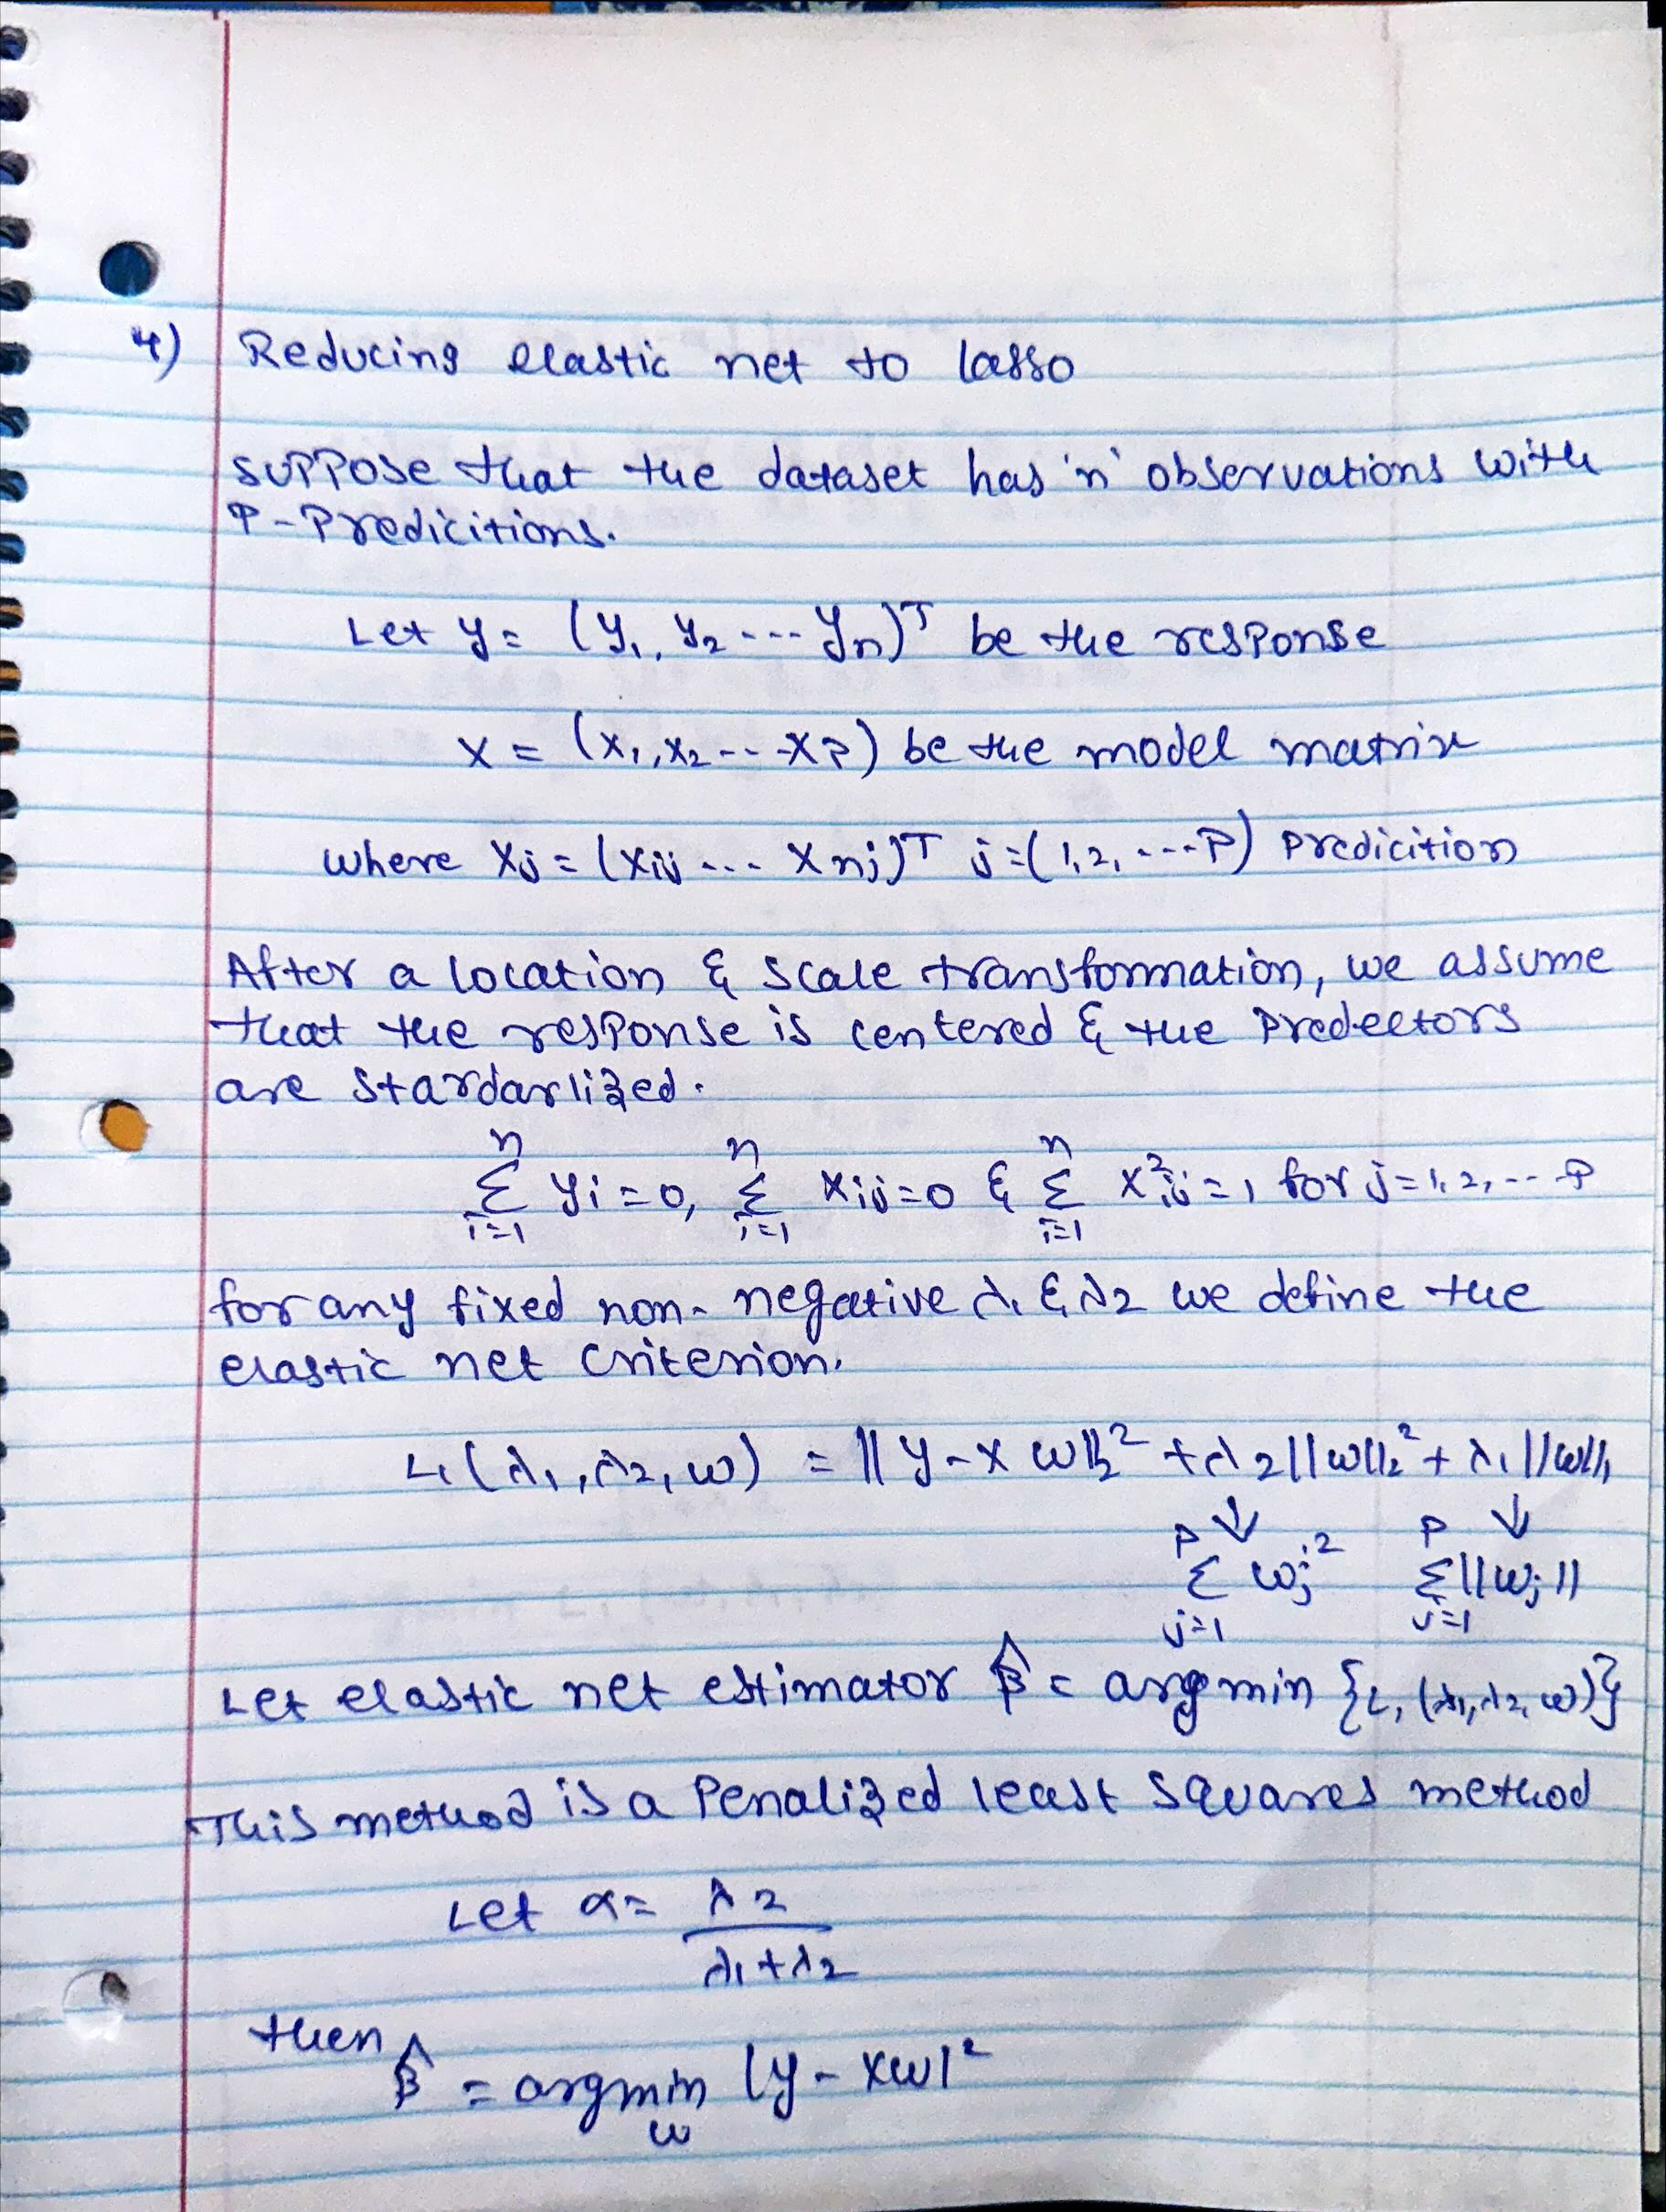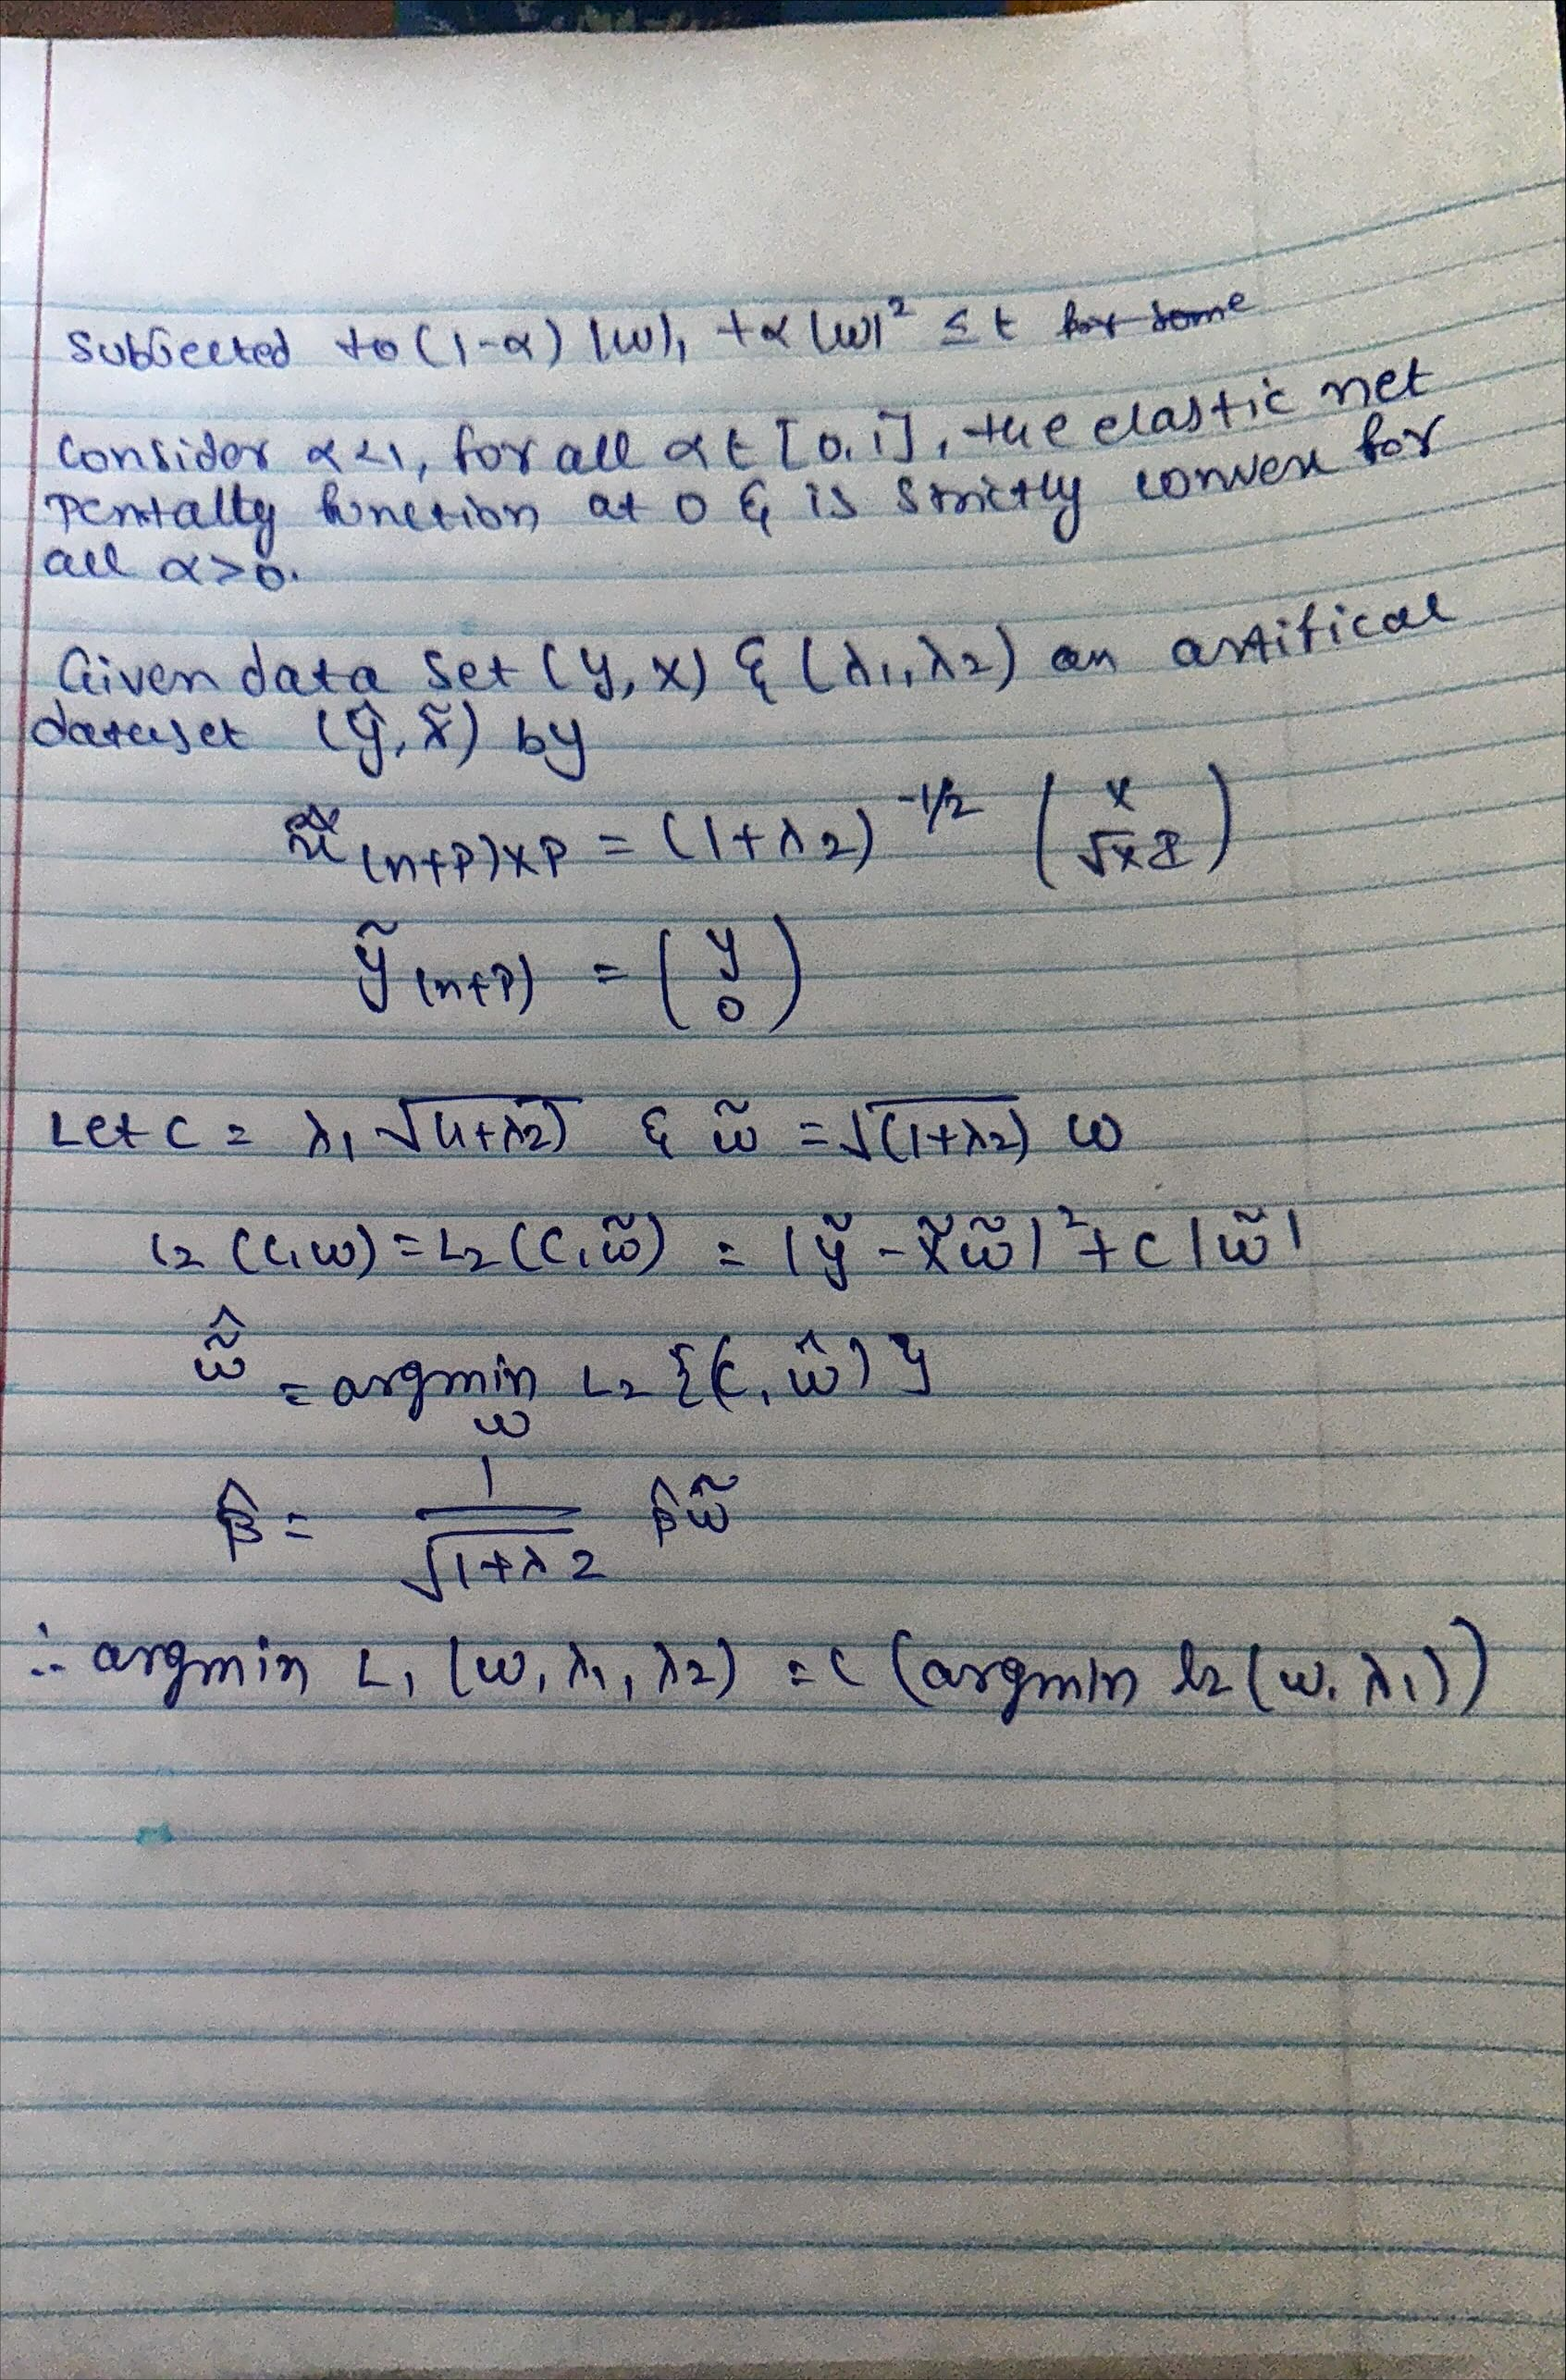